In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [2]:
seg_df = []
for csv in Path('nanonets_extracted_csvs/stage3_final_clean').glob("*.csv"):
    seg_df.append(pd.read_csv(csv, sep='\t'))
seg_df = pd.concat(seg_df)
seg_df = seg_df.drop(['Page', 'Duration_calc'], axis=1)

confinement_reason_tidy = {'Covid - 19': 'COVID-19', 
                           'OWN REQUEST': 'Own Request',
                           'PROTECTION': 'Protection',
                           'SAFETY OF OTHERS': 'Safety of Others',
                           'Security of Correctional Faci': 'Security of Correctional Facility'}
seg_df['Confinement Reason'] = seg_df['Confinement Reason'].apply(lambda x: confinement_reason_tidy[x] if x in confinement_reason_tidy else x)
#seg_df.to_csv('parsed_clean_correctional_segregration_data.csv', sep='\t', index=False)

In [98]:
seg_sum = seg_df.groupby(['Correctional Facility', 'Confinement Reason', 'Ethnic Origin'])['Duration'].sum()
seg_sum = seg_sum.reset_index().rename(columns={'Duration': 'Total Segregation Duration (Days)'})
seg_sum = seg_sum.set_index(['Correctional Facility', 'Confinement Reason', 'Ethnic Origin'])
seg_num = seg_df.groupby(['Correctional Facility', 'Confinement Reason', 'Ethnic Origin']).size()
seg_num = seg_num.reset_index(name='Segregations (Distinct Events)').set_index(['Correctional Facility', 'Confinement Reason', 'Ethnic Origin'])
seg_sum['Segregations (Distinct Events)'] = seg_num['Segregations (Distinct Events)']
seg_sum = seg_sum.reset_index()
seg_sum.to_csv('segregation_by_facility_type_and_ethnicity.csv', sep='\t', index=False)

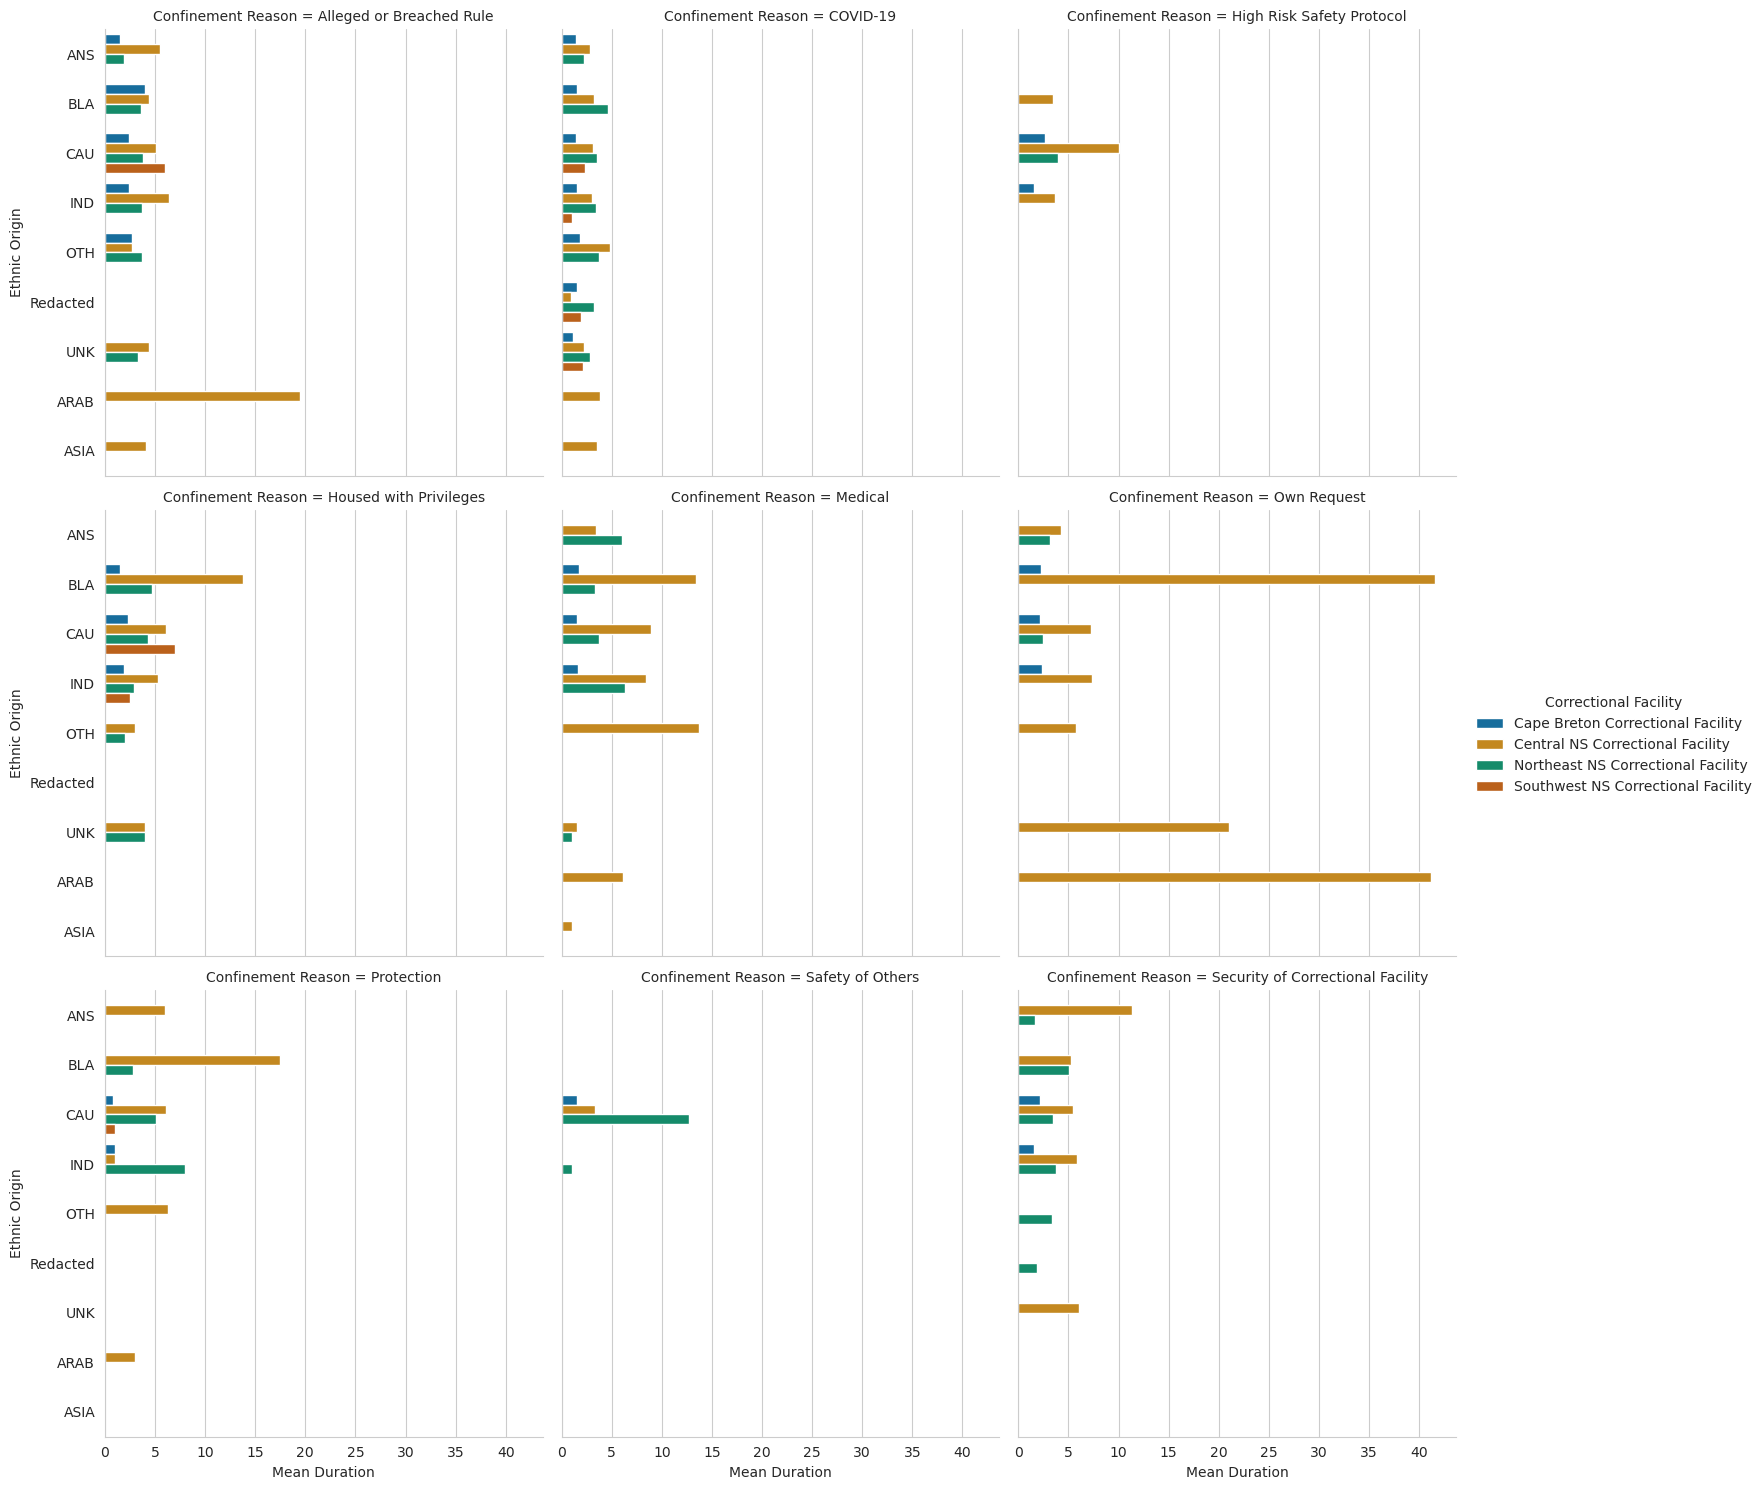

In [164]:
seg_mean = seg_df.groupby(['Correctional Facility', 'Confinement Reason', 'Ethnic Origin'])['Duration'].mean()
seg_mean = seg_mean.reset_index(name='Mean Duration')
sns.catplot(data=seg_mean, kind='bar', col='Confinement Reason', col_wrap=3, hue='Correctional Facility', x='Mean Duration', y='Ethnic Origin')
plt.savefig('mean_seg_all_plots.png', dpi=300, bbox_inches='tight')

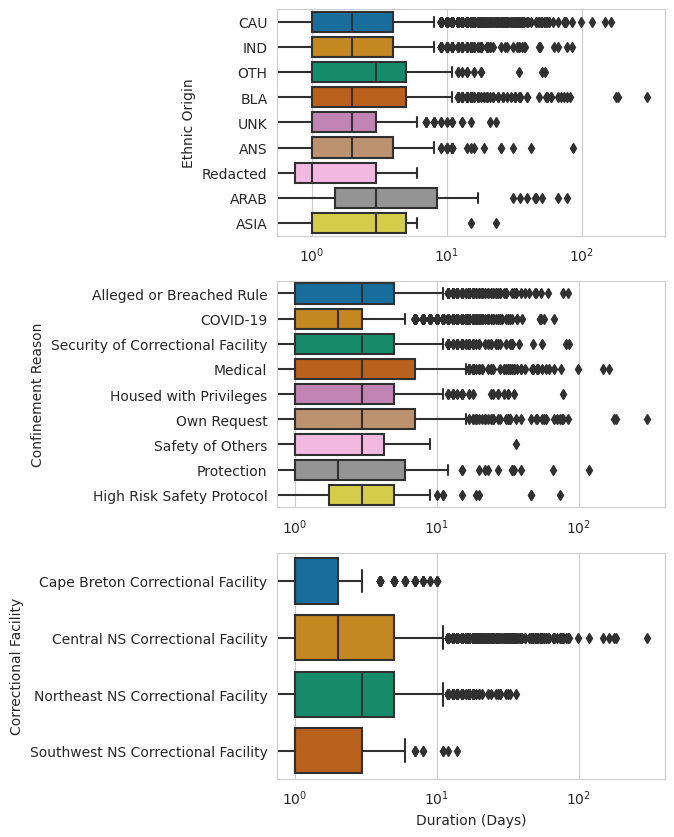

In [165]:
fig, axes = plt.subplots(3, 1, figsize=(5,10))
sns.boxplot(data=seg_df, x='Duration', y='Ethnic Origin', ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_xlabel('')

sns.boxplot(data=seg_df, x='Duration', y='Confinement Reason', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_xlabel('')

sns.boxplot(data=seg_df, x='Duration', y='Correctional Facility', ax=axes[2])
axes[2].set_xscale('log')
axes[2].set_xlabel('Duration (Days)')

plt.savefig('seg_durations.png', dpi=300,  bbox_inches='tight')

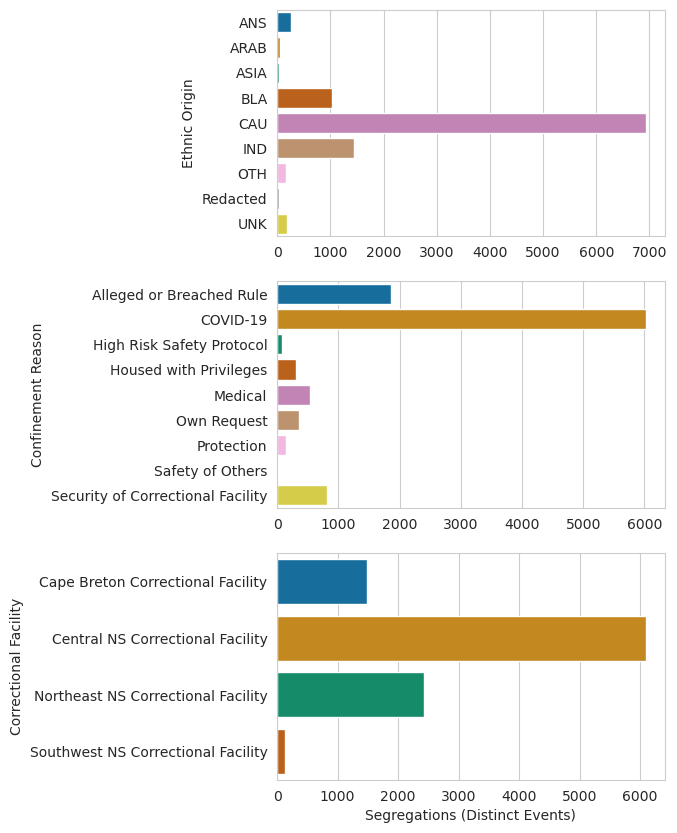

In [166]:
fig, axes = plt.subplots(3, 1, figsize=(5,10))
sns.barplot(data=seg_df.groupby(['Ethnic Origin']).size().reset_index(name='Segregations (Distinct Events)'), 
            x='Segregations (Distinct Events)', y='Ethnic Origin', ax=axes[0])
#axes[0].set_xscale('log')
axes[0].set_xlabel('')

sns.barplot(data=seg_df.groupby(['Confinement Reason']).size().reset_index(name='Segregations (Distinct Events)'), 
            x='Segregations (Distinct Events)', y='Confinement Reason', ax=axes[1])
axes[1].set_xlabel('')

sns.barplot(data=seg_df.groupby(['Correctional Facility']).size().reset_index(name='Segregations (Distinct Events)'), 
            x='Segregations (Distinct Events)', y='Correctional Facility', ax=axes[2])
axes[2].set_xlabel('Segregations (Distinct Events)')

plt.savefig('seg_number.png', dpi=300,  bbox_inches='tight')

In [92]:
seg_df['Entry'] = pd.to_datetime(seg_df['Entry'])
seg_df['Quarter'] = seg_df['Entry'].dt.year.astype(str) + "-Q" + seg_df['Entry'].dt.quarter.astype(str)
seg_df = seg_df.sort_values('Quarter')

quarter_conf_total = seg_df.groupby(['Correctional Facility', 'Quarter'])['Duration'].sum().reset_index(name='Duration (Days)').sort_values('Quarter')
quarter_origin_total = seg_df.groupby(['Ethnic Origin', 'Quarter'])['Duration'].sum().reset_index(name='Duration (Days)').sort_values('Quarter')
quarter_reason_total = seg_df.groupby(['Confinement Reason', 'Quarter'])['Duration'].sum().reset_index(name='Duration (Days)').sort_values('Quarter')

quarter_conf_num = seg_df.groupby(['Correctional Facility', 'Quarter'])['Duration'].size().reset_index(name='Segregations (Distinct Events)').sort_values('Quarter')
quarter_origin_num = seg_df.groupby(['Ethnic Origin', 'Quarter'])['Duration'].size().reset_index(name='Segregations (Distinct Events)').sort_values('Quarter')
quarter_reason_num = seg_df.groupby(['Confinement Reason', 'Quarter'])['Duration'].size().reset_index(name='Segregations (Distinct Events)').sort_values('Quarter')

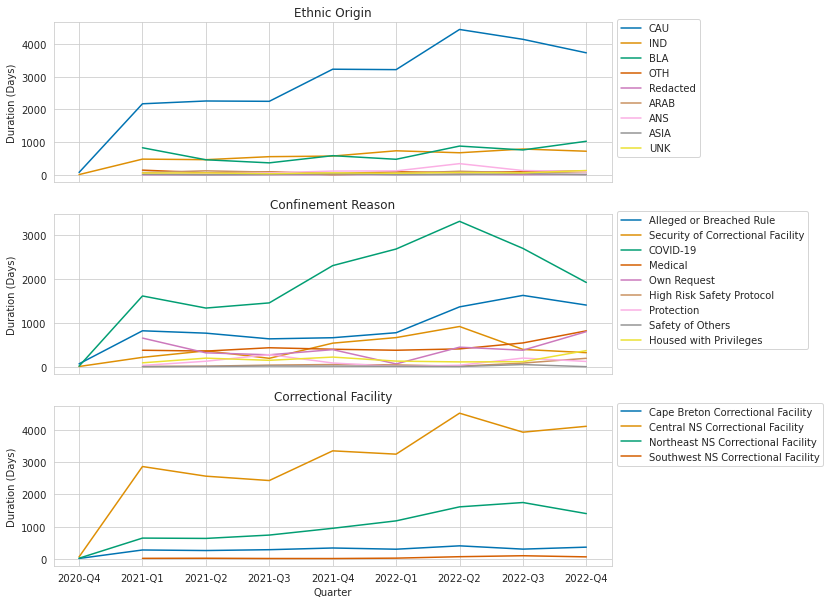

In [93]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), sharex=True)
sns.lineplot(data=quarter_origin_total, x='Quarter', #order=order,
            y='Duration (Days)', hue='Ethnic Origin', ax=axes[0])
axes[0].legend(bbox_to_anchor=(1.0, 1.05))#, title='Ethnic Origin')
axes[0].set_title('Ethnic Origin')

sns.lineplot(data=quarter_reason_total, x='Quarter',#order=order,
            y='Duration (Days)', hue='Confinement Reason', ax=axes[1])
axes[1].legend(bbox_to_anchor=(1.0, 1.05))
axes[1].set_title('Confinement Reason')

sns.lineplot(data=quarter_conf_total, x='Quarter',#order=order,
            y='Duration (Days)', hue='Correctional Facility', ax=axes[2])
axes[2].legend(bbox_to_anchor=(1.0, 1.05))
axes[2].set_title('Correctional Facility')
plt.savefig('duration_over_time.png', dpi=300, bbox_inches='tight')


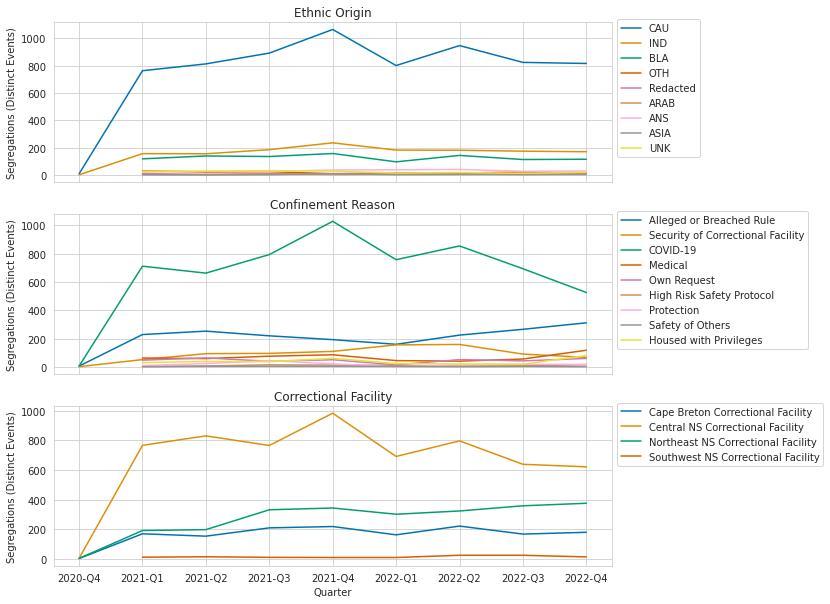

In [94]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), sharex=True)
sns.lineplot(data=quarter_origin_num, x='Quarter', #order=order,
            y='Segregations (Distinct Events)', hue='Ethnic Origin', ax=axes[0])
axes[0].legend(bbox_to_anchor=(1.0, 1.05))#, title='Ethnic Origin')
axes[0].set_title('Ethnic Origin')

sns.lineplot(data=quarter_reason_num, x='Quarter',#order=order,
            y='Segregations (Distinct Events)', hue='Confinement Reason', ax=axes[1])
axes[1].legend(bbox_to_anchor=(1.0, 1.05))
axes[1].set_title('Confinement Reason')

sns.lineplot(data=quarter_conf_num, x='Quarter',#order=order,
            y='Segregations (Distinct Events)', hue='Correctional Facility', ax=axes[2])
axes[2].legend(bbox_to_anchor=(1.0, 1.05))
axes[2].set_title('Correctional Facility')
plt.savefig('number_over_time.png', dpi=300, bbox_inches='tight')


In [91]:
quarterly_tally = seg_df.groupby(['Quarter', 'Correctional Facility', 'Confinement Reason', 'Ethnic Origin'])

quarterly_summary = quarterly_tally['Duration'].describe()

quarterly_summary['Total Segregration Duration (Days)'] = quarterly_tally['Duration'].sum()
quarterly_summary = quarterly_summary.rename(columns={'count': 'Segregations (Distinct Events)',
                                                      'mean': 'Mean Segregation Duration (Days)',
                                                      'std': 'Segregation Duration Standard Deviation',
                                                      'min': 'Minimum Segregation Duration (Days)',
                                                      '50%': 'Median Segregation Duration (Days)',
                                                      'max': 'Maximum Segregation Duration (Days)',
                                                      '25%': '25th Percentile Segregation Duration (Days)',
                                                      '75%': '75th Percentile Segregation Duration (Days)'}).drop('Segregation Duration Standard Deviation', axis=1)
quarterly_summary.to_csv('aggregated_durations_by_quarter_facility_confinement_origin.tsv', sep='\t')

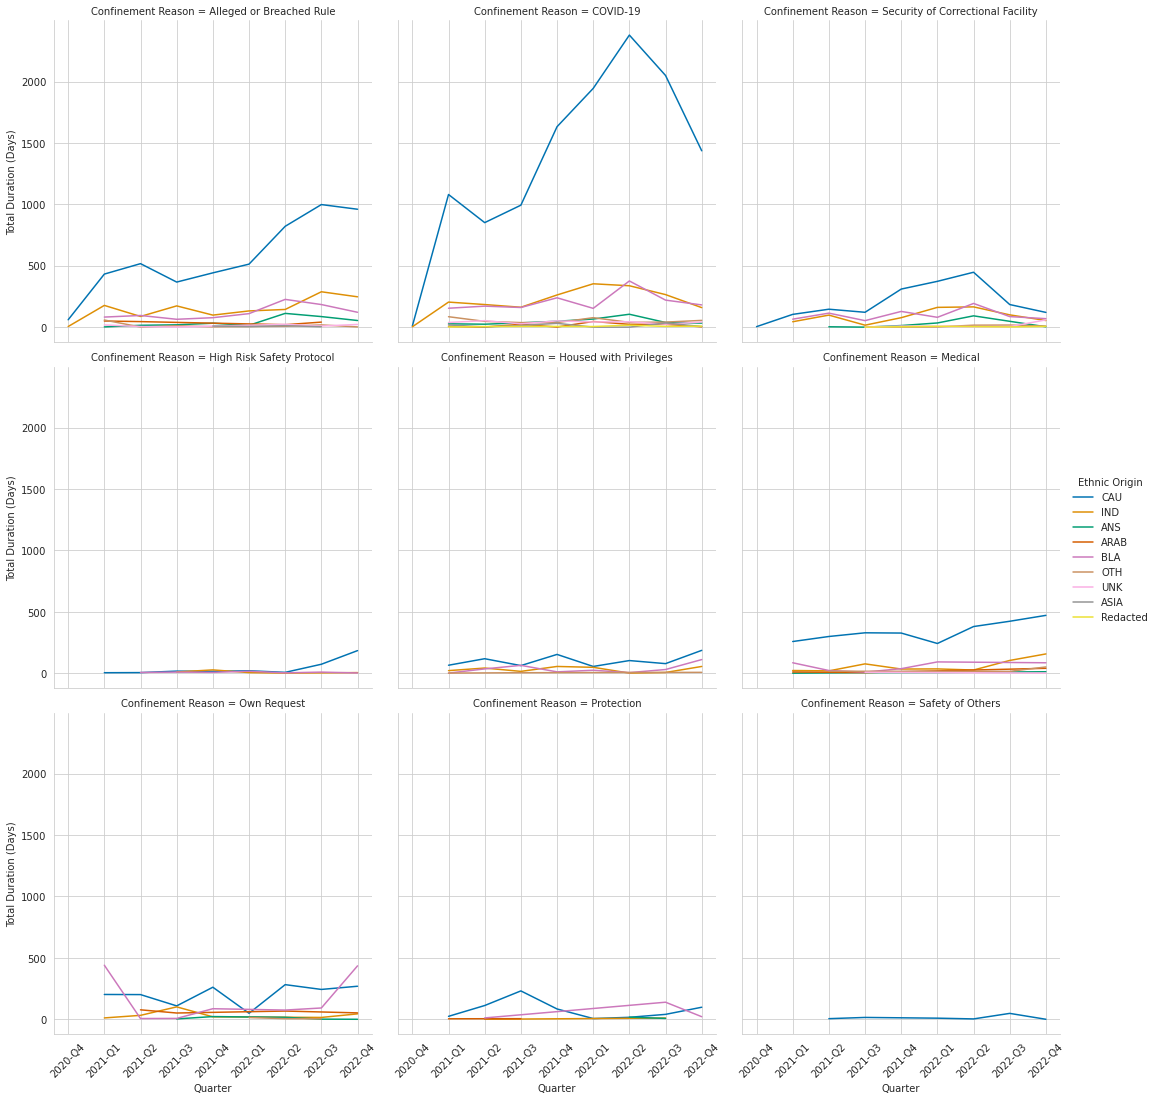

In [121]:
quarterly_tally = seg_df.groupby(['Quarter', 'Confinement Reason', 'Ethnic Origin'])
quarterly_tally = quarterly_tally['Duration'].sum().reset_index(name='Total Duration (Days)')


rel = sns.relplot(data = quarterly_tally, x='Quarter', y='Total Duration (Days)', col='Confinement Reason', col_wrap=3, hue='Ethnic Origin', kind='line')
rel.set_xticklabels(rotation=45)
plt.savefig('total_quarterly_duration_facet_grid.png', dpi=300, bbox_inches='tight')

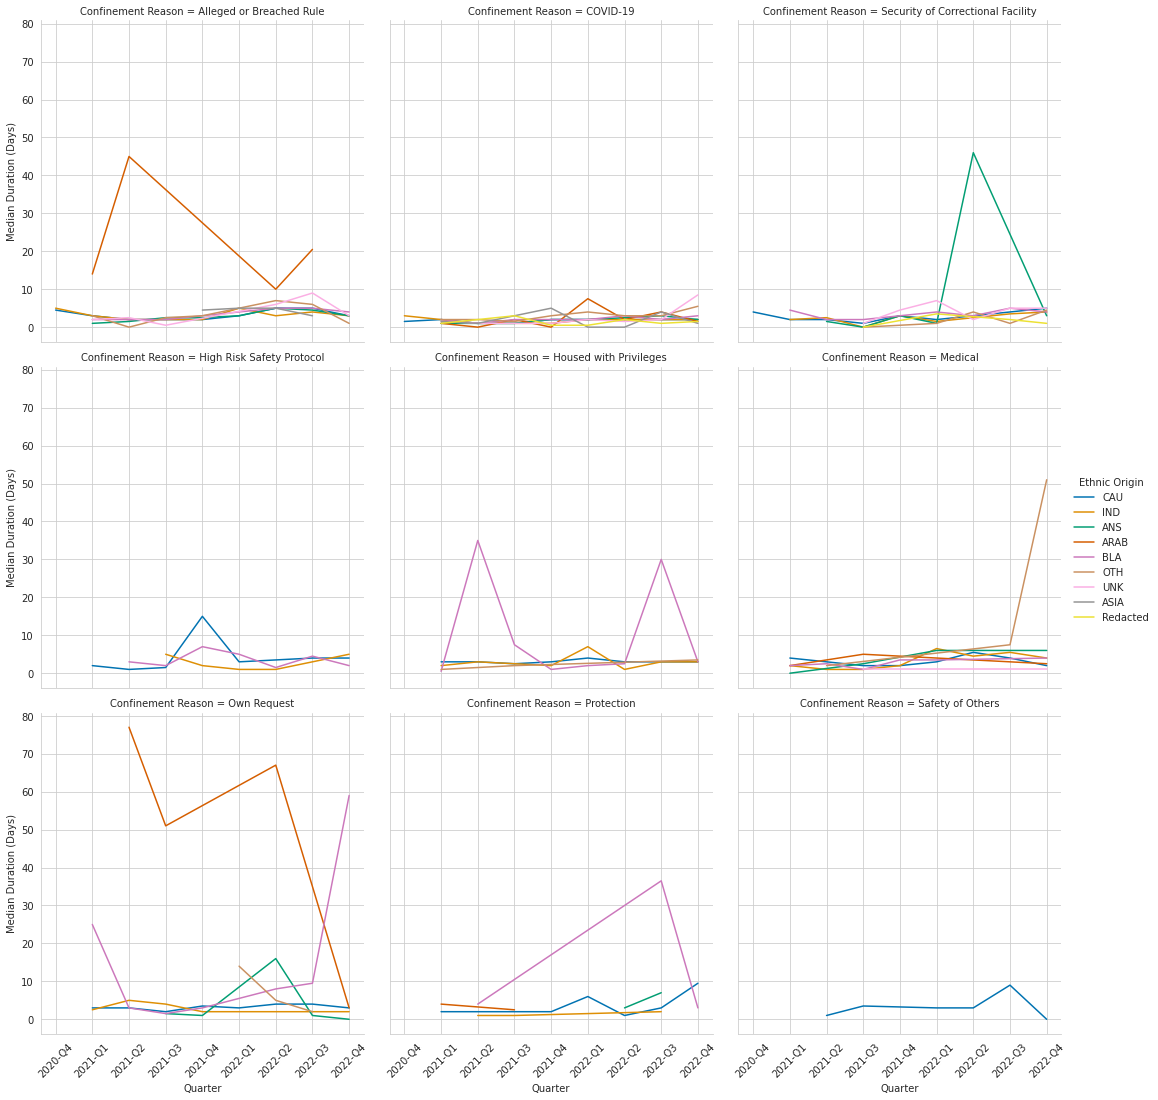

In [122]:
quarterly_tally = seg_df.groupby(['Quarter', 'Confinement Reason', 'Ethnic Origin'])
quarterly_tally = quarterly_tally['Duration'].median().reset_index(name='Median Duration (Days)')


rel = sns.relplot(data = quarterly_tally, x='Quarter', y='Median Duration (Days)', col='Confinement Reason', col_wrap=3, hue='Ethnic Origin', kind='line')
rel.set_xticklabels(rotation=45)
plt.savefig('median_quarterly_duration_facet_grid.png', dpi=300, bbox_inches='tight')

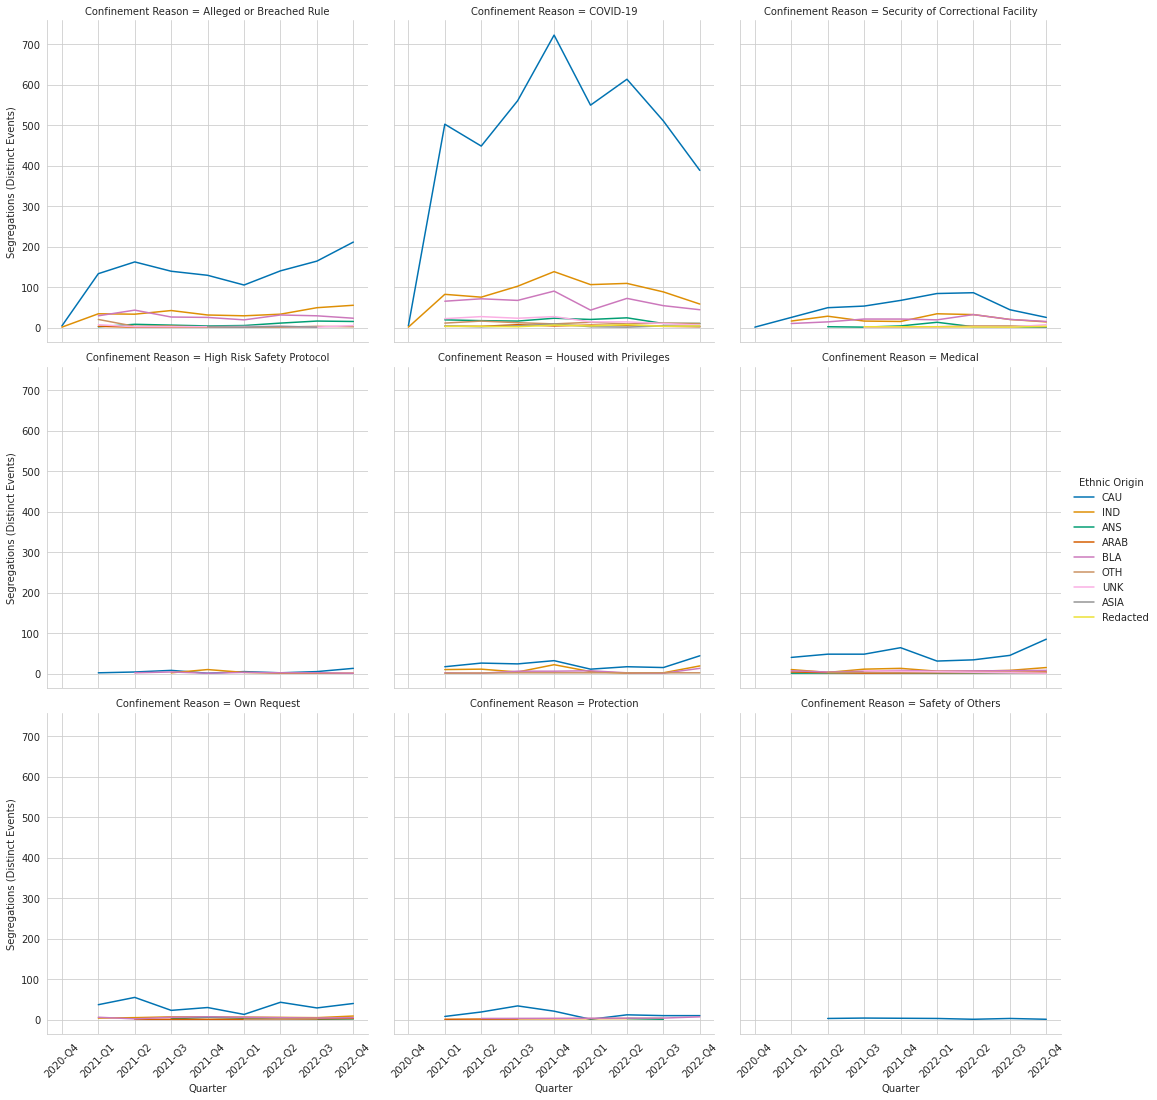

In [123]:
quarterly_tally = seg_df.groupby(['Quarter', 'Confinement Reason', 'Ethnic Origin'])
quarterly_tally = quarterly_tally['Duration'].size().reset_index(name='Segregations (Distinct Events)')


rel = sns.relplot(data = quarterly_tally, x='Quarter', y='Segregations (Distinct Events)', col='Confinement Reason', col_wrap=3, hue='Ethnic Origin', kind='line')
rel.set_xticklabels(rotation=45)
plt.savefig('quarterly_num_facet_grid.png', dpi=300, bbox_inches='tight')